![polytechnic of tehran](https://www.irangi.org/uploads/images/4_1560089256_1291127534.png)
<div style="text-align:center"><span style="color:blue; font-family:Georgia; font-size:2em;">BTC Price Forecasting</span></div>.

<div style="text-align:center"><span style="color:blue; font-family:Georgia; font-size:2em;">Professor: Dr. A.MohammadPour (adel.m@aut.ac.ir)</span></div>.     

<div style="text-align:center"><span style="color:blue; font-family:Georgia; font-size:2em;">TAs:Elmira Talebi Anaraki (e.talebi@aut.ac.ir)</span></div>.

<div style="text-align:center"><span style="color:blue; font-family:Georgia; font-size:2em;">Student: Mohammadreza Ardestani (ardestani.zr@gmail.com), Saba Sadeghi (sabasedegi@gamil.com) </span></div>


Date: June,20,2021



# BTC price forcasting 





## intro:
1. Data set (Yahoo Finance)
3. Objective: To forcast future price



## We will go through

1. Define time series 
2. understand Addative and multiplative models.
3. understand the components of Time Series { Terend, seasonality, Cyclicity, Irregularities}
4. Stationarity { definition , test , different ways to transform data from non-stationary to stationary} 
5. Deep dive into different predictive models. { AR, MA, ARMA , ARIMA, SARIMAX }
6. How to interpret the model summary
7. Choose the best model
8. Forcast Future

# I. Data - info and properties 


## initial setup

In [1]:
# step 1:  importing libs 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn 
import seaborn as sns

%matplotlib inline 

import warnings 
warnings.filterwarnings('ignore')


In [2]:
# step 2: Define params for matplot 
from matplotlib.pylab import rcParams 
plt.rcParams['figure.figsize']= (12,5)
plt.rcParams['axes.grid']= False
plt.rcParams['font.size']= 10
plt.rcParams['font.style']= 'normal'


In [3]:
# Getting data set from yahoo finance API 
!pip install yfinance
import yfinance as yf


     |████████████████████████████████| 6.3MB 6.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=1778d8afff49c3ffc8c00bd84840aa7a63e96c88c8bd098411f5aef3695b96e8
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
dt= yf.download(tickers='BTC-USD',period='100mo',interval='1mo')

[*********************100%***********************]  1 of 1 completed


In [5]:
dt
dt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82 entries, 2014-10-01 to 2021-06-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       82 non-null     float64
 1   High       82 non-null     float64
 2   Low        82 non-null     float64
 3   Close      82 non-null     float64
 4   Adj Close  82 non-null     float64
 5   Volume     82 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 4.5 KB


In [6]:
df1 = dt.copy()


In [7]:
df1.drop(['Low', 'High','Adj Close','Volume','Open'], axis='columns', inplace=True)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82 entries, 2014-10-01 to 2021-06-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   82 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [9]:
df1 = df1.iloc[:-1 , :] # removing last damn of-beat date "2021-06-12"

In [10]:
df1.keys()

Index(['Close'], dtype='object')

In [11]:
df1.info()
df1

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2014-10-01 to 2021-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   81 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


,Close
Date,
2014-10-01,338.321014
2014-11-01,378.046997
2014-12-01,320.192993
2015-01-01,217.464005
2015-02-01,254.263000
...,...
2021-02-01,45137.769531
2021-03-01,58918.832031
2021-04-01,57750.175781


In [12]:
# Datetime conversion
#df1['Date'] = pd.to_datetime(df1.Date)# Setting the index
#df1.set_index('Date', inplace=True)

## The rest 


In [13]:
print(df1.info(),'\n',df1.describe().round(decimals=2),'\n')


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2014-10-01 to 2021-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   81 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB
None 
           Close
count     81.00
mean    8072.08
std    11932.86
min      217.46
25%      575.47
50%     4703.39
75%     9350.53
max    58918.83 



# II. Data - Time Series concepts & components 

1. Time Series: 
Datapoints recorded over a period of time. A typical charactristic of a Time Serie is it follows an approximate wave like  a pattern with alternating troughs and crests.
"Time series data is a collection of quantities that are assembled over even intervals in time and ordered chronologically. The tiem interval at which data is collection is generally referred to as teh time series frequency."

2. Additive and Multiplicative Models - Concepts and When to use Which one.
In a simple language, additive models are those in which the factors are independent of each other and does not impact another, whereas in Multiplicative models these factors are correlated with each other.

**'Additive Models:  A data model in which the effects of individual factors are differentiated and added together to model the data.- 
'Multiplicative Models: This model assumes that as the data increase, so does the seasonal pattern. Most time series plots exhibit such a pattern. In this model, the trend and seasonal components are multiplied and then added to the error component.**



**How to choose between these two models:**





**Choose the multiplicative mod& when the magnitude of the seasonal pattern in the data depends on the magnitude of the data. In other words. the magnitude of the seasonal pattern increases as the data values increase and decrease as the data values decrease.**



Choose the additive model when the magnitude of the seasonal pattern in the data does not depend on the magnitude of the data. In other words, the magnitude of the seasonal pattern does not change as the series goes up or down.
If the pattern in the data is not very obvious, and you have trouble choosing between the addrtne and multiplicative procedures you can by both and choose the one with smaller accuracy measures.

 

**Further Reading & knowledge source:**

https://support.minitab.com/en-us/minitab/19/help-and-how-to/statistical-modeling/time-series/supporting-topics/time-series-models/additive-and-multiplicative-models/


https://www.aptech.com/blog/introduction-to-the-fundamentals-of-time-series-data-and-analysis/



 DataSet visu
 ---------------



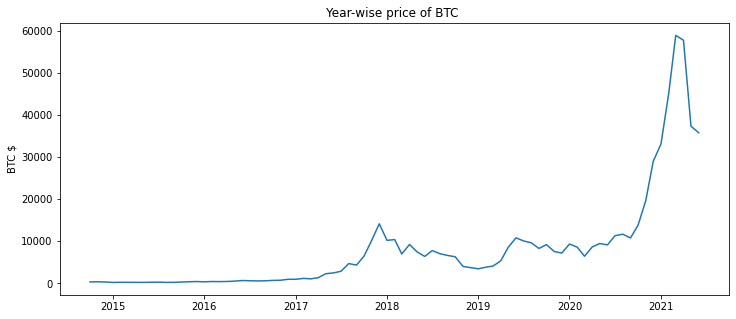

In [14]:
# step 6: Visulalization of Dataset:
print("\n","DataSet visu\n","---------------\n")

plt.plot(df1)
plt.title("Year-wise price of BTC ")
plt.ylabel("BTC $")
plt.show()


**Observations:**
1. Trend : In some partial periods (we call them BEAR MARKETS)  we have down-trend , and some periods we have side-way movement in the market, but the general trend is "upward"
2.Seasonality: usually "December" and "January" we have sharp increasing in the price of stocks, but it does not reqularly happen.
3. Cyclicity: Again we seems to have 4-year cycles. but it's not reqular

# III. Stationarity


By stationarity we mean that the given dataset should have a (approximately) constant mean and variance over the given period of time. We can check this by visualization or by performing statistical test, in this case we will use "Augmented Dickey Fulle" test of ADF.

In [15]:
# step 7: Calculation of moving average and rolling standard deviation:
moving_avg= df1.rolling(window=12).mean()
moving_std= df1.rolling(window=12).std()

print(moving_avg)
print(moving_std)

                   Close
Date                    
2014-10-01           NaN
2014-11-01           NaN
2014-12-01           NaN
2015-01-01           NaN
2015-02-01           NaN
...                  ...
2021-02-01  17345.736328
2021-03-01  21719.085286
2021-04-01  25810.053792
2021-05-01  28132.703532
2021-06-01  30353.474609

[81 rows x 1 columns]
                   Close
Date                    
2014-10-01           NaN
2014-11-01           NaN
2014-12-01           NaN
2015-01-01           NaN
2015-02-01           NaN
...                  ...
2021-02-01  12098.646393
2021-03-01  16486.890526
2021-04-01  18869.944522
2021-05-01  18383.717503
2021-06-01  17467.327608

[81 rows x 1 columns]


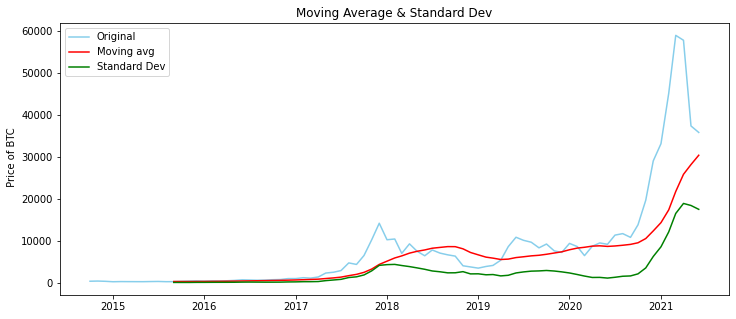

In [16]:
# Step 8: Stationarity check using rolling statistics: 
actual =plt.plot(df1,color='skyblue',label="Original")
mean = plt.plot(moving_avg,color='red',label="Moving avg")
std = plt.plot(moving_std,color='green',label="Standard Dev")
plt.legend(loc='best')
plt.title("Moving Average & Standard Dev")
plt.ylabel(" Price of BTC")
plt.show()


In [17]:
df1.keys()

Index(['Close'], dtype='object')

In [18]:
# Step 9: Stationarity test using augmented Dickey Fuller test statistics:
from statsmodels.tsa.stattools import adfuller

print("result of Dickey-Fuller test:\n",
      '-----------------\n',
      "Null Hypothesis (Ho): Data is non-stationary\n" ,
      "Alternate Hypothesis (H1): Data is stationary\n")
df_test = adfuller(df1['Close'],autolag='AIC')

df_output = pd.Series(df_test[0:4], index=['Test Statistic',
                                           'p-value',
                                           'Lags USed',
                                           'Number of Observations Used',])

for key, value in df_test[4].items():
  df_output['Critical value (%s)' %key] = value

print(df_output)

result of Dickey-Fuller test:
 -----------------
 Null Hypothesis (Ho): Data is non-stationary
 Alternate Hypothesis (H1): Data is stationary

Test Statistic                  0.488233
p-value                         0.984511
Lags USed                       5.000000
Number of Observations Used    75.000000
Critical value (1%)            -3.520713
Critical value (5%)            -2.900925
Critical value (10%)           -2.587781
dtype: float64



Null Hypothesis(Ho): Data is not stationary

Alternative Hypothesis(H1): Data is stationary

Observations of our test: 
1. P-value is much much higher that our significance level (0.05 << 0.9898) 
2. Dataset is not stationary 
3. Mean is not Constant
4. Variance is not constant



# Data transformation from non-stationary to stationary

1. Log transformation.
2. Subtracting simple moving average.
3. Subtrating Exponential moving average.
4. Subtracting from previous value (shift).
5. Seasonal Decomposition.

In [19]:
# Step 9: Creating a customized function to test the stationarity using rolling stats and ADF at once:

from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):

  #Determining rolling statistics
  movingAverage = timeseries.rolling(window=12).mean()
  movingSTD = timeseries.rolling(window=12).std()

  #Plot rolling statistics:
  print("\n","Stationarity Check\n","---------------\n")
  orig= plt.plot(timeseries,color='skyblue',label='Original')
  mean= plt.plot(movingAverage,color='red',label='Rolling mean')
  std = plt.plot(movingSTD,color='green',label='Rolling STD')
  plt.legend(loc='best')
  plt.title('Rolling mean and STD')
  plt.show(block=False)

  # Perform Dickey-Fuller test:
  print("\n","Result of Dickey \n","---------------\n")
  print("Null Hypothesis(Ho): Data is not stationary\n")
  print("Alternative Hypothesis(H1): Data is stationary\n")

  # adding ['Close'] to following line
  # chaning "timeseries," to "timeseries['Close'],"
  df_test=adfuller(timeseries['Close'],autolag='AIC')
  df_output = pd.Series(df_test[0:4], index=['Test Statistic',
                                           'p-value',
                                           'Lags USed',
                                           'Number of Observations Used',])

  for key, value in df_test[4].items():
    df_output['Critical value (%s)' %key] = value

  print(df_output)

# 1.) Log transformation

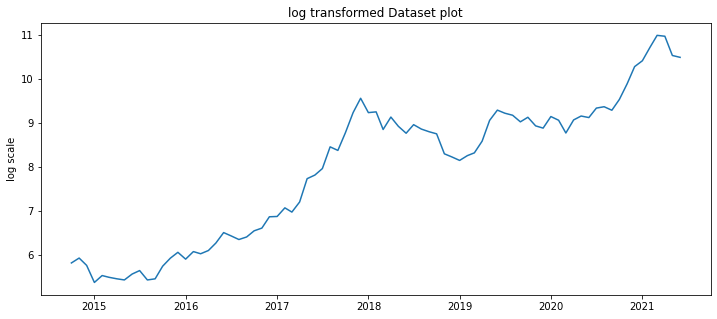


 Stationarity Check
 ---------------



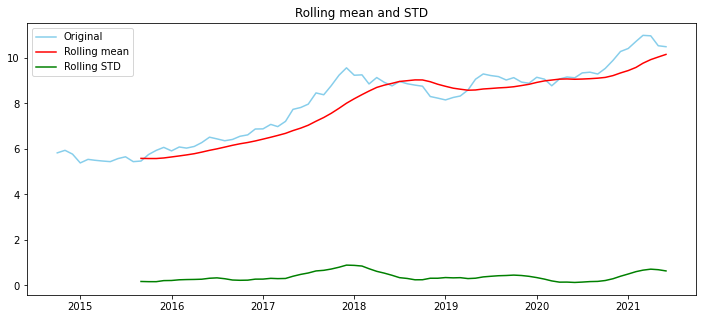


 Result of Dickey 
 ---------------

Null Hypothesis(Ho): Data is not stationary

Alternative Hypothesis(H1): Data is stationary

Test Statistic                 -0.301787
p-value                         0.925251
Lags USed                       0.000000
Number of Observations Used    80.000000
Critical value (1%)            -3.514869
Critical value (5%)            -2.898409
Critical value (10%)           -2.586439
dtype: float64


In [20]:
# Per forming log transformation on the dataset:

df1_log= np.log(df1)
plt.plot(df1_log)
plt.title('log transformed Dataset plot')
plt.ylabel('log scale')
plt.show()

# Stationarity test of the log transformed Dataset
test_stationarity(df1_log)

Observations of our test: 
1. P-value is much much higher that our significance level (0.05 << 0.9898) 
2. Dataset is not stationary 
3. Mean is not Constant
4. Variance is not constant

As the P-value is greater than our threshold value of 0.05 we fail to reject our Null hypothesis.

conclusion: Therefore we can infer the dataset is not stationary

# 2.) Differencing simple moving Average:

               Close
Date                
2014-10-01       NaN
2014-11-01       NaN
2014-12-01       NaN
2015-01-01       NaN
2015-02-01       NaN
...              ...
2021-02-01  1.141312
2021-03-01  1.223266
2021-04-01  1.045100
2021-05-01  0.494457
2021-06-01  0.338412

[81 rows x 1 columns]



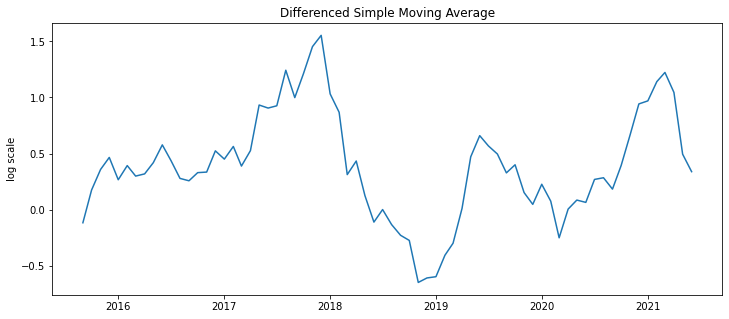


 Stationarity Check
 ---------------



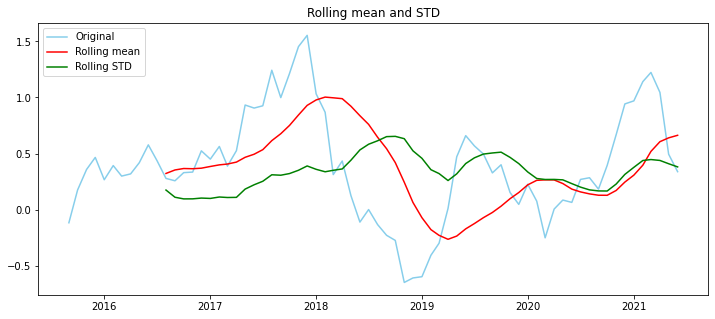


 Result of Dickey 
 ---------------

Null Hypothesis(Ho): Data is not stationary

Alternative Hypothesis(H1): Data is stationary

Test Statistic                 -2.880247
p-value                         0.047694
Lags USed                       3.000000
Number of Observations Used    66.000000
Critical value (1%)            -3.533560
Critical value (5%)            -2.906444
Critical value (10%)           -2.590724
dtype: float64


In [21]:
# Finding moving average of the log transformed dataset and then 
# subtracting it from the log transformed values:
df1_log_moving_avg =df1_log.rolling(12).mean()
df1_log_difference =df1_log - df1_log_moving_avg
print(df1_log_difference)

# removing 'Nan' or Null values otherwise in the ADF it will throw error:
df1_log_difference.dropna(inplace=True)

#Plotting the dataset after subtracting log transformed moving 
# avg values from the log transformed values: 
print('')
plt.plot(df1_log_difference)
plt.title('Differenced Simple Moving Average')
plt.ylabel('log scale')
plt.show()

# Performing Test of Stationarity
test_stationarity(df1_log_difference)

**Conclusion: this dataset is non-stationary since p value is not less than 0.05** 


# 3.) Differencing Exponentioal Moving Average:


 Exponential Moving Average:
 ---------------

               Close
Date                
2014-10-01  5.823995
2014-11-01  5.881110
2014-12-01  5.841535
2015-01-01  5.716523
2015-02-01  5.676662
...              ...
2021-02-01  9.128216
2021-03-01  9.233532
2021-04-01  9.331673
2021-05-01  9.399464
2021-06-01  9.460981

[81 rows x 1 columns]

 log transformed vs log transformed moving average:
 ---------------



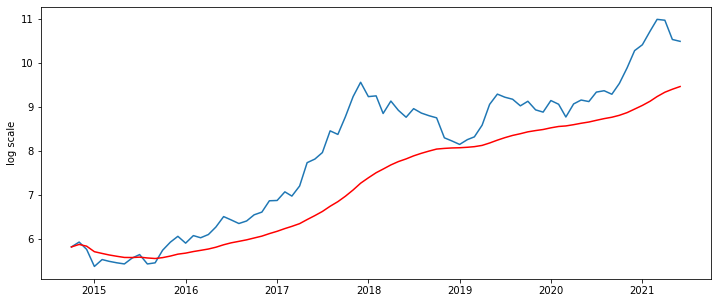


 log transformed vs log transformed moving average:
 ---------------

               Close
Date                
2014-10-01  0.000000
2014-11-01  0.053909
2014-12-01 -0.072611
2015-01-01 -0.334490
2015-02-01 -0.138293
...              ...
2021-02-01  1.589258
2021-03-01  1.750384
2021-04-01  1.632209
2021-05-01  1.128165
2021-06-01  1.024366

[81 rows x 1 columns]

 Stationarity Check
 ---------------



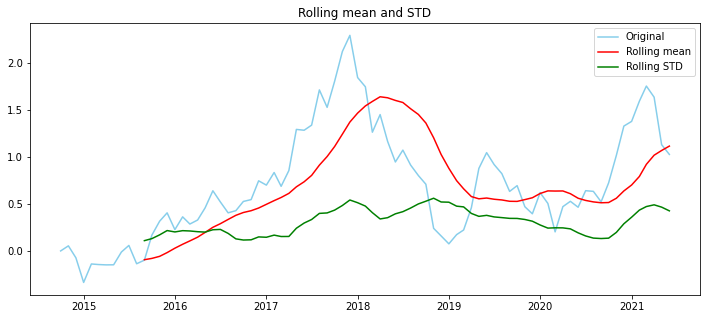


 Result of Dickey 
 ---------------

Null Hypothesis(Ho): Data is not stationary

Alternative Hypothesis(H1): Data is stationary

Test Statistic                 -1.916422
p-value                         0.324375
Lags USed                       1.000000
Number of Observations Used    79.000000
Critical value (1%)            -3.515977
Critical value (5%)            -2.898886
Critical value (10%)           -2.586694
dtype: float64


In [22]:
# Step 1: Finding exponential moving average of the log transformed data:
df1_log_ema = df1_log.ewm(halflife=12,min_periods=0,adjust=True).mean()

print("\n","Exponential Moving Average:\n","---------------\n")
print(df1_log_ema)

#step 2: visualizaiton of 'log transformed data' and 'log transformed exponential moving average':
print("\n","log transformed vs log transformed moving average:\n","---------------\n")

plt.plot(df1_log)
plt.plot(df1_log_ema, color='red')
plt.ylabel('log scale')
plt.show()

# step 3: subtracting 
df1_log_ema_difference = df1_log - df1_log_ema
print("\n","log transformed vs log transformed moving average:\n","---------------\n")  
print(df1_log_ema_difference)

# Performing Testinof Stationary
test_stationarity(df1_log_ema_difference)

Since 0.005 is not less than 0.05 we fail to reject our hull hypothesis.
therefore we can conclude that the dataset is non-stationary


# 4.) Differencing Previous Values:


 shifted log values:
 ---------------

               Close
Date                
2014-11-01  0.111023
2014-12-01 -0.166095
2015-01-01 -0.386891
2015-02-01  0.156336
2015-03-01 -0.040283
...              ...
2021-02-01  0.309752
2021-03-01  0.266441
2021-04-01 -0.020034
2021-05-01 -0.436253
2021-06-01 -0.042282

[80 rows x 1 columns]

log transformed vs log transformed shifted data:
 ---------------



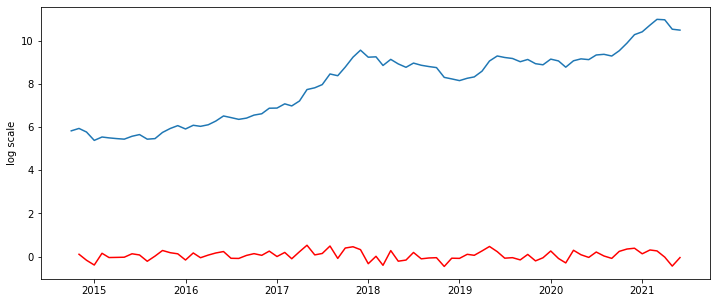


 Stationarity Check
 ---------------



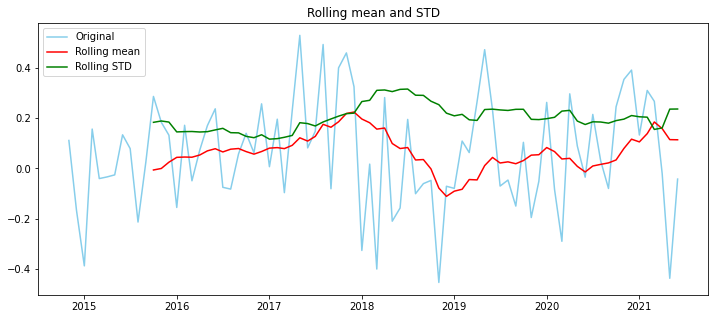


 Result of Dickey 
 ---------------

Null Hypothesis(Ho): Data is not stationary

Alternative Hypothesis(H1): Data is stationary

Test Statistic                -7.507207e+00
p-value                        4.104608e-11
Lags USed                      0.000000e+00
Number of Observations Used    7.900000e+01
Critical value (1%)           -3.515977e+00
Critical value (5%)           -2.898886e+00
Critical value (10%)          -2.586694e+00
dtype: float64


In [23]:
# step 1: subtracting persent log scale values from its previous values:
df1_log_shift = df1_log - df1_log.shift()
df1_log_shift.dropna(inplace = True)
print("\n","shifted log values:\n","---------------\n")
print(df1_log_shift)


# Step 2: visualizing shifted data:
print("\nlog transformed vs log transformed shifted data:\n","---------------\n")
plt.plot(df1_log)
plt.plot(df1_log_shift,color='red')
plt.ylabel('log scale')
plt.show()

# Step 3: Test of stationarity 
test_stationarity(df1_log_shift)


As the p-value obtained is greater than our threshold value of 0.05 , we fail to reject the hull hypothesis.

Conslusion: therefore we can conclude the dataset is stationary.

Inorder to make it stationary we will try and shift the value with two periods  in the next step

# 4.1) differencing Previous 2 values:


 shifted log values:
 ---------------

               Close
Date                
2014-12-01 -0.055071
2015-01-01 -0.552985
2015-02-01 -0.230555
2015-03-01  0.116052
2015-04-01 -0.073923
...              ...
2021-02-01  0.442364
2021-03-01  0.576194
2021-04-01  0.246407
2021-05-01 -0.456287
2021-06-01 -0.478535

[79 rows x 1 columns]

log transformed vs log transformed shifted data:
 ---------------



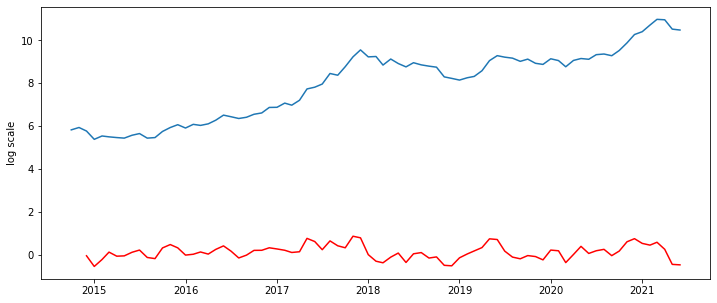


 Stationarity Check
 ---------------



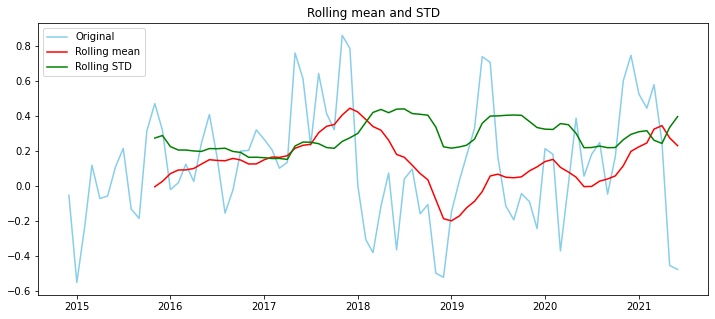


 Result of Dickey 
 ---------------

Null Hypothesis(Ho): Data is not stationary

Alternative Hypothesis(H1): Data is stationary

Test Statistic                 -3.147784
p-value                         0.023213
Lags USed                       7.000000
Number of Observations Used    71.000000
Critical value (1%)            -3.526005
Critical value (5%)            -2.903200
Critical value (10%)           -2.588995
dtype: float64


In [24]:
# step 1: subtracting persent log scale values from its previous values:
df1_log_shift2 = df1_log - df1_log.shift(2)
df1_log_shift2.dropna(inplace = True)
print("\n","shifted log values:\n","---------------\n")
print(df1_log_shift2)


# Step 2: visualizing shifted data:
print("\nlog transformed vs log transformed shifted data:\n","---------------\n")
plt.plot(df1_log)
plt.plot(df1_log_shift2,color='red')
plt.ylabel('log scale')
plt.show()

# Step 3: Test of stationarity 
test_stationarity(df1_log_shift2)

p-val is less than 0.05 so our data is stationary 

# 5) Seasonal Decomposition:


Time Series Components : 
1. Trend: A time series plot that looks like it centers around an increasing or decreasing line, suggests the presence of a trend.
2. Seasonality: Seasonality occurs when time-series data exhibits regular and predictable patterns of time intervals that are smaller than a year.
3. Cyclicity : A cyclic pattern exists when data exhibit rises and falls that are not of the fixed period. The duration of these fluctuations is usually at least 2 years. 

In [25]:
print(df1_log)

                Close
Date                 
2014-10-01   5.823995
2014-11-01   5.935019
2014-12-01   5.768924
2015-01-01   5.382033
2015-02-01   5.538369
...               ...
2021-02-01  10.717475
2021-03-01  10.983916
2021-04-01  10.963882
2021-05-01  10.527629
2021-06-01  10.485347

[81 rows x 1 columns]


In [26]:
print(df1_log.info(),'\n',df1_log.describe().round(decimals=2),'\n')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2014-10-01 to 2021-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   81 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB
None 
        Close
count  81.00
mean    7.96
std     1.63
min     5.38
25%     6.36
50%     8.46
75%     9.14
max    10.98 



In [27]:
df1_log.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2014-10-01 to 2021-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   81 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB



Ploting decomposed dataset:
 ---------------



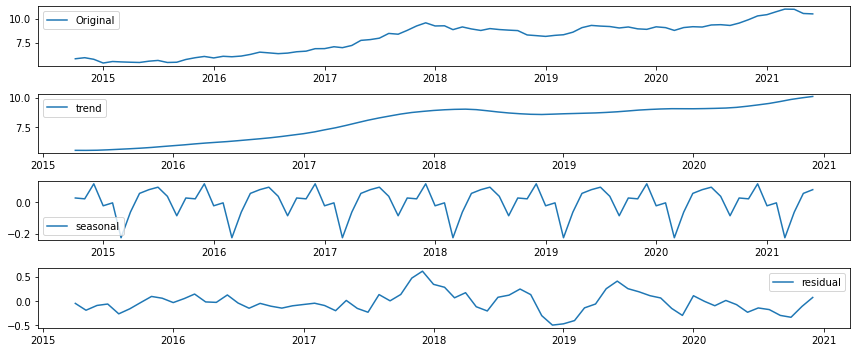


 Stationarity Check
 ---------------



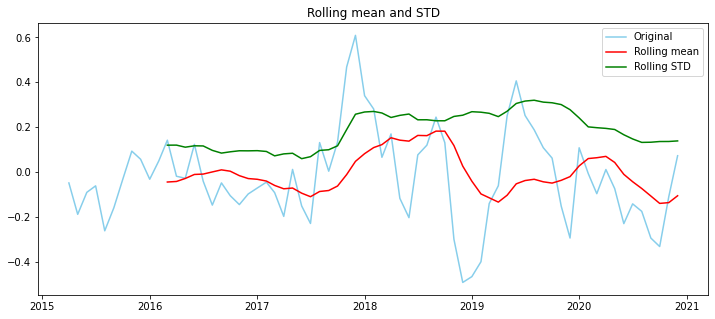


 Result of Dickey 
 ---------------

Null Hypothesis(Ho): Data is not stationary

Alternative Hypothesis(H1): Data is stationary

Test Statistic                 -4.030436
p-value                         0.001259
Lags USed                      11.000000
Number of Observations Used    57.000000
Critical value (1%)            -3.550670
Critical value (5%)            -2.913766
Critical value (10%)           -2.594624
dtype: float64


In [28]:
# Step 1:decomposing the log transformed dataset into it's trend, seasonality
# and cyclical components:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df1_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

print("\nPloting decomposed dataset:\n","---------------\n")

# Step 2: Polloting the decomposed dataset:
plt.subplot(411)
plt.plot(df1_log,label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend ,label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


#step 3: test of stationarity 
df1_log_decomposed = residual
df1_log_decomposed.dropna(inplace= True)

df1_log_decomposed
test_stationarity(df1_log_decomposed)




observation: 
P-value is less than our significance level so our dataset is stationary

# V. Finding the lags in AR and MA model:

In [29]:
from statsmodels.tsa.stattools import arma_order_select_ic
print(arma_order_select_ic(df1_log_shift))
print(arma_order_select_ic(df1_log_shift2))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


{'bic':            0         1         2
0 -10.487640 -7.901390 -3.555179
1  -7.992008 -3.869248  0.509273
2  -3.683346  0.510734  2.691134
3  -0.205312  4.174970  3.984515
4   4.170552  8.612520  8.332418, 'bic_min_order': (0, 0)}


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


{'bic':            0         1         2
0  56.629545 -5.446572 -5.753348
1  26.608450 -4.982202 -3.720920
2  24.836069 -0.847822  0.947987
3  22.448318  0.317824  3.230106
4  17.427658  3.273952  4.241031, 'bic_min_order': (0, 2)}


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


# Model -1: Autoregressive Model (AR)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



 AutoRegressive model summary and plot:
 ---------------

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                   80
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  10.606
Method:                       css-mle   S.D. of innovations              0.212
Date:                Mon, 21 Jun 2021   AIC                            -13.211
Time:                        14:21:20   BIC                             -3.683
Sample:                    11-01-2014   HQIC                            -9.391
                         - 06-01-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0578      0.029      2.008      0.048       0.001       0.114
ar.L1.D.Close     0.1474      0.111      1.327      0.189      

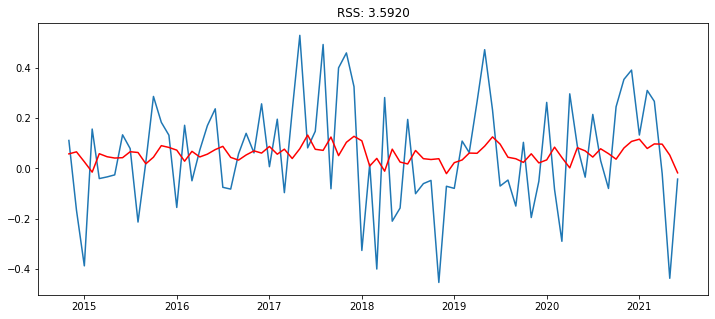

In [30]:
from statsmodels.tsa.arima_model import ARIMA

model= ARIMA(df1_log, order=(2,1,0))
result_AR= model.fit(disp=-1)

plt.plot(df1_log_shift)
plt.plot(result_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum( (result_AR.fittedvalues-df1_log_shift['Close'])**2 ) )

print("\n AutoRegressive model summary and plot:\n","---------------\n")
print(result_AR.summary())

# Model -2:Moving Average Model (MA)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



 # Moving Average Model summary and plot:
 ---------------

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                   80
Model:                 ARIMA(0, 1, 2)   Log Likelihood                  10.542
Method:                       css-mle   S.D. of innovations              0.212
Date:                Mon, 21 Jun 2021   AIC                            -13.083
Time:                        14:21:21   BIC                             -3.555
Sample:                    11-01-2014   HQIC                            -9.263
                         - 06-01-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0582      0.028      2.109      0.038       0.004       0.112
ma.L1.D.Close     0.1460      0.112      1.304      0.196    

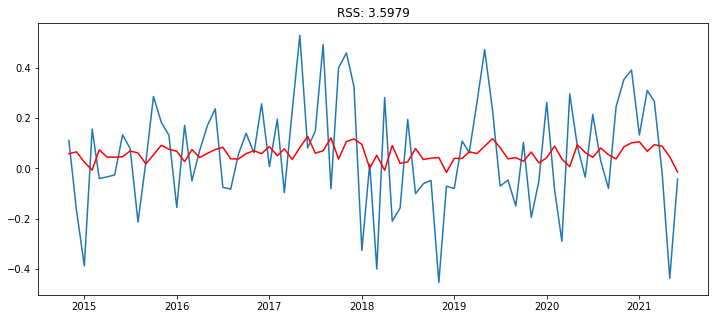

In [31]:
from statsmodels.tsa.arima_model import ARIMA 

model = ARIMA(df1_log,order=(0,1,2))
result_MA = model.fit(disp=-1)

plt.plot(df1_log_shift)
plt.plot(result_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum( (result_MA.fittedvalues-df1_log_shift['Close'])**2 ) )

print("\n # Moving Average Model summary and plot:\n","---------------\n")
print(result_MA.summary())

Observations: 37f 77 88 

# VII. Converting log scale back to normal scale 

In [32]:
# step1: getting prediction
predictions_ARIMA_diff = pd.Series(result_AR.fittedvalues, copy=True )
print( predictions_ARIMA_diff.head())


Date
2014-11-01    0.057798
2014-12-01    0.065898
2015-01-01    0.026453
2015-02-01   -0.014749
2015-03-01    0.058443
dtype: float64


In [33]:
# Step 2: Getting cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2014-11-01    0.057798
2014-12-01    0.123696
2015-01-01    0.150149
2015-02-01    0.135400
2015-03-01    0.193843
dtype: float64


In [34]:
# Step 3:Converting the predicted value converted to log scale:
predictions_ARIMA_log = pd.Series(df1_log['Close'].iloc[0], index= df1_log['Close'].index )
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.tail()

Date
2021-02-01    10.259047
2021-03-01    10.356325
2021-04-01    10.452748
2021-05-01    10.505585
2021-06-01    10.488118
dtype: float64

In [35]:
# Step 4: Converting predicted values from log scale to normal scale:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA.head()

Date
2014-10-01    338.321014
2014-11-01    358.451586
2014-12-01    382.868488
2015-01-01    393.131466
2015-02-01    387.375593
dtype: float64

# VIII. FInal Dataframe showing actual, predicted and errors

In [36]:
x = pd.Series(predictions_ARIMA, name = 'Passengers_Predicted')
x.to_frame().round()

y=df1['Close']
y

z = pd.DataFrame()
z['actual'] = y
z['predicted'] = x 
z['residuals'] = y-x
z['residual_square'] = (y-x)**2

print(z.round())

print('I. Mean Squared Error (MSE): ', "{:.4f}".format(sum(z['residual_square']/len(z))))
print('II. Root Mean Squared Error (RMSE) :', "{:.4f}".format(np.sqrt(sum(z['residual_square']/len(z)))))

print('RMSE: %.4f'% np.sqrt(sum(z['residual_square']/len(z))))

             actual  predicted  residuals  residual_square
Date                                                      
2014-10-01    338.0      338.0       -0.0              0.0
2014-11-01    378.0      358.0       20.0            384.0
2014-12-01    320.0      383.0      -63.0           3928.0
2015-01-01    217.0      393.0     -176.0          30859.0
2015-02-01    254.0      387.0     -133.0          17719.0
...             ...        ...        ...              ...
2021-02-01  45138.0    28540.0    16598.0      275500487.0
2021-03-01  58919.0    31455.0    27463.0      754242077.0
2021-04-01  57750.0    34639.0    23111.0      534106665.0
2021-05-01  37333.0    36519.0      814.0         662530.0
2021-06-01  35787.0    35887.0      -99.0           9864.0

[81 rows x 4 columns]
I. Mean Squared Error (MSE):  28875324.6492
II. Root Mean Squared Error (RMSE) : 5373.5765
RMSE: 5373.5765


# IX. Final plot showing our actul and predicted values:

No handles with labels found to put in legend.


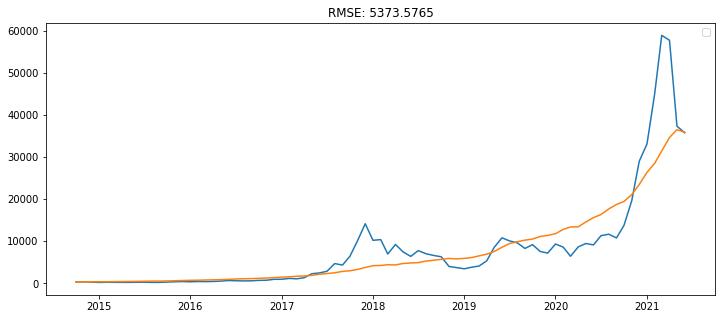

In [37]:
plt.plot(df1)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum(z['residual_square']/len(z))))
plt.legend(loc='best')

plt.show()

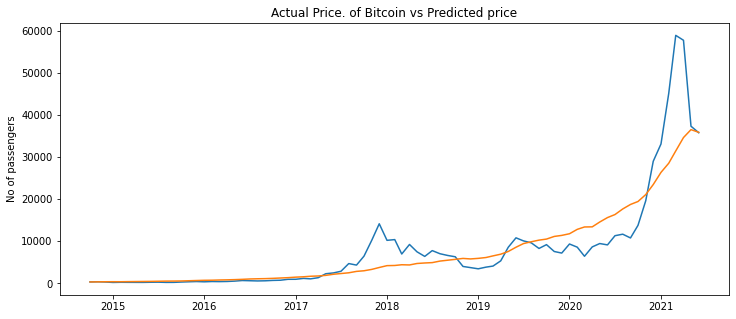

In [38]:
plt.plot(df1)
plt.plot(z['predicted'])
plt.title('Actual Price. of Bitcoin vs Predicted price')
plt.ylabel('No of passengers')

plt.show()

# X. Forcasting for  next two years using ARIMA




In [39]:

# Forcasting the demand for 
# future_dates = pd.data_rage(start='1960-12-01', end='1969-12-01')
future_pred = result_AR.predict(start=len(df1), end=len(df1)+24 , typ='levels')
#future_pred.index= future_dates

future_pred

future_pred = np.exp(future_pred)
future_pred.tail()


2023-03-01    115678.342136
2023-04-01    122561.364693
2023-05-01    129853.936683
2023-06-01    137580.426868
2023-07-01    145766.653987
Freq: MS, dtype: float64

# XI. Plot showing Forcast for next ten years using ARIMA 

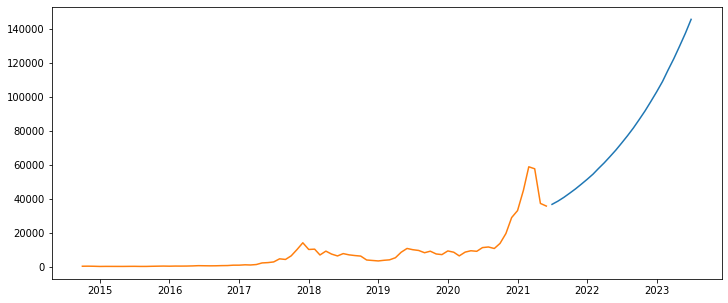

In [40]:
plt.plot(future_pred)
plt.plot(z['actual'])
plt.show()

# XII. SARIMAX Model 

In [41]:
# Import SARIMAX and fitting the model:

import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(df1,order=(2,1,2),seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Close   No. Observations:                   81
Model:             SARIMAX(2, 1, 2)x(1, 1, 1, 12)   Log Likelihood                -648.679
Date:                            Mon, 21 Jun 2021   AIC                           1311.357
Time:                                    14:21:53   BIC                           1326.894
Sample:                                10-01-2014   HQIC                          1317.513
                                     - 06-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1236      0.151     -0.819      0.413      -0.420       0.172
ar.L2         -0.9894      0.135   

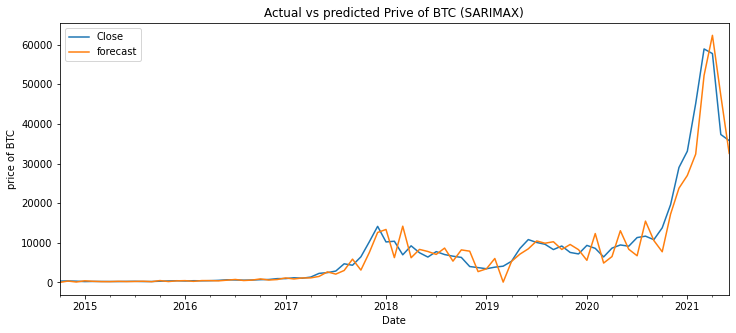

In [42]:
# Prediction using SARIMAX and plot betwee acutal and fitted values:
df1['forecast']= results.predict()
df1[ ['Close','forecast'] ].plot()
plt.title('Actual vs predicted Prive of BTC (SARIMAX)')

plt.ylabel('price of BTC')
plt.show()

In [43]:
# Finding the root meand square of the errors in the models: 
df1['residulas']= df1['Close'] - df1['forecast']
df1['residual_square']= (df1['Close']- df1['forecast'])**2

print(df1.round())

print('I. Mean Squared Error (MSE):', "{:.4f}".format(sum(df1['residual_square']/len(z))))
print('I. Root Mean Square Error (RMSE):', "{:.4f}".format(np.sqrt(sum(df1['residual_square']/len(z)))))


              Close  forecast  residulas  residual_square
Date                                                     
2014-10-01    338.0       0.0      338.0         114461.0
2014-11-01    378.0     350.0       28.0            795.0
2014-12-01    320.0     109.0      211.0          44623.0
2015-01-01    217.0     412.0     -194.0          37773.0
2015-02-01    254.0     287.0      -33.0           1079.0
...             ...       ...        ...              ...
2021-02-01  45138.0   32383.0    12755.0      162683073.0
2021-03-01  58919.0   52236.0     6682.0       44654241.0
2021-04-01  57750.0   62348.0    -4598.0       21141798.0
2021-05-01  37333.0   47184.0    -9851.0       97038812.0
2021-06-01  35787.0   32566.0     3221.0       10374904.0

[81 rows x 4 columns]
I. Mean Squared Error (MSE): 8748998.2503
I. Root Mean Square Error (RMSE): 2957.8706


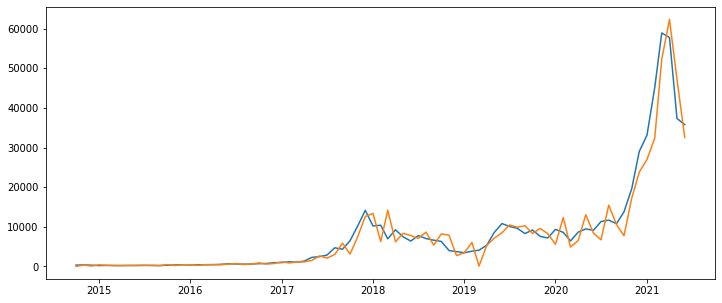

In [44]:
# 195 
plt.plot(df1['Close'])
plt.plot(df1['forecast'])
plt.show()

# XIII. plot Shwoing  actual  Passengers vs predicted passengers using 

# XIV. Forecast fot next ten years using SARIMAX 

In [45]:
future_pred = results.predict(start=len(df1),end= len(df1)+60,typ='levels')
future_pred

2021-07-01     51627.979014
2021-08-01     54595.870023
2021-09-01     38453.570478
2021-10-01     38853.517593
2021-11-01     55484.394524
                  ...      
2026-03-01    131081.225470
2026-04-01    117962.142667
2026-05-01    117444.131445
2026-06-01    129416.645248
2026-07-01    127712.881969
Freq: MS, Length: 61, dtype: float64

# XV. plot showing Forexast for next five years using SARIMAX

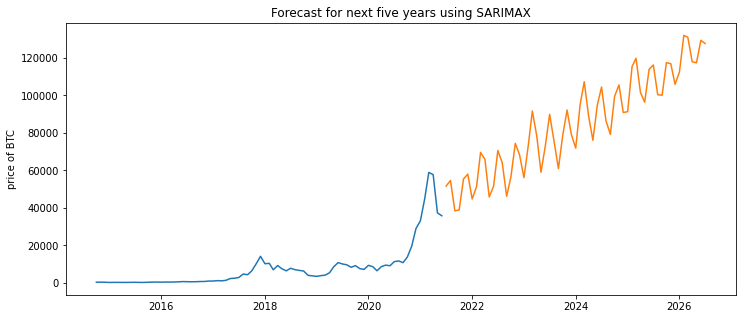

In [46]:
plt.plot(df1['Close'])
plt.plot(future_pred)
plt.title('Forecast for next five years using SARIMAX')
plt.ylabel('price of BTC')
plt.show()